In [4]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [35]:
df=pd.read_csv('emails.csv')

In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [10]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [12]:
pd.set_option('display.max_column',None)
print("\nSentiment Distribution:")
print(df['spam'].value_counts())


Sentiment Distribution:
spam
0    4360
1    1368
Name: count, dtype: int64


In [13]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
def preprocess_text(text):

    text=re.sub(r'<*?>','',text)  # Remove HTML tags
    text=text.lower()  # Convert to lowercase
    text=re.sub(r'[^a-z\s]','',text)  # Remove non
    tokens= word_tokenize(text)  # Tokenize text
    tokens=[word for word in tokens if word not in stop_words]  # Remove stop
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [15]:
print("Preprocessing 5000 emails:")
df=df.sample(5000).copy()
df["Cleaned_text"]=df["text"].apply(preprocess_text)
print("preprocessing done.")

print("\n Comparing original and cleaned emails:")
pd.set_option('display.max_colwidth', None)
display(df[['text', 'Cleaned_text']].head())

Preprocessing 5000 emails:
preprocessing done.

 Comparing original and cleaned emails:


,text,Cleaned_text
2224,"Subject: 2 nd message - re : dec 2 super saturday interviewer confirmation please see the attached for interviewer information . shelly jones 11 / 28 / 2000 05 : 54 pm to : scott earnest / hou / ect @ ect , tim mckone / corp / enron @ enron , richard dimichele / enron communications @ enron communications , brandon neff / hou / ees @ ees , john j lavorato / corp / enron @ enron , guido caranti / enron _ development @ enron _ development , robert bailey / hou / ees @ ees , dixie yeck / enron communications @ enron communications , cheryl lipshutz / hou / ect @ ect , john godbold / hou / ect @ ect , chuck randall / hou / ees @ ees , michelle juden / hou / ees @ ees , mark reese / hou / ees @ ees , jim fallon / enron communications @ enron communications , sarah wesner / corp / enron @ enron , sylvia barnes / hou / ees @ ees , kirk neuner / enron communications @ enron communications , mari capestany / hou / ees @ ees , wayne perry / enron _ development @ enron _ development , john neslage / enron _ development @ enron _ development , fred lagrasta / hou / ect @ ect , bani arora / hou / ees @ ees , jonathan risch / hou / ees @ ees , heather kroll / hou / ect @ ect , brad romine / na / enron @ enron , julia kazibwe / hou / ees @ ees , thomas rich / fgt / enron @ enron , mark smith / corp / enron @ enron , vince j kaminski / hou / ect @ ect , kathy m lynn / corp / enron @ enron , stephen stenhouse / enron communications @ enron communications , jere c overdyke / hou / ect @ ect , jim meyn / na / enron @ enron , donald reid / enron @ gateway , ken gustafson / hou / ees @ ees , daniel reck / hou / ect @ ect cc : sue foust / hou / ect @ ect , rebecca serwin / corp / enron @ enron , crissy collett / enron communications @ enron communications , sonia guerra / enron _ development @ enron _ development , mary lou browder / enron _ development @ enron _ development , mary lou browder / enron _ development @ enron _ development , adriana cortes / hou / ect @ ect , leticia botello / hou / ees @ ees , paula pierre / enron communications @ enron communications , theresa davis / hou / ect @ ect , kelly lacalli / hou / ees @ ees , lily guerra / hou / ees @ ees , lucy marshall / enron communications @ enron communications , amy rios / hou / ect @ ect , karen street / hou / ees @ ees , cindy long / corp / enron @ enron , becky young / na / enron @ enron , marcia a linton / na / enron @ enron , claudette harvey / hou / ect @ ect , brenda flores - cuellar / na / enron @ enron , valerie villareal / hou / ees @ ees , becky young / na / enron @ enron , amy flores / corp / enron @ enron , sally slaughter / enron communications @ enron communications , donna baker / hou / ect @ ect , chaun roberts / na / enron @ enron , terri bachand / enron communications @ enron communications , angie collins / hou / ect @ ect subject : dec 2 super saturday interviewer confirmation please see the attached . this is a confirmation for saturday interviews only . if you volunteered for friday night dinner as well , notification will be sent via email by end of work day wednesday regarding your friday night dinner participation . please feel free to contact me with any questions . thank you shelly jones ext . 3 - 0943",subject nd message dec super saturday interviewer confirmation please see attach interviewer information shelly jones pm scott earnest hou ect ect tim mckone corp enron enron richard dimichele enron communications enron communication brandon neff hou ees ees john j lavorato corp enron enron guido caranti enron development enron development robert bailey hou ees ee dixie yeck enron communications enron communications cheryl lipshutz hou ect ect john godbold hou ect ect chuck randall hou ees ee michelle juden hou ees ees mark reese hou ee ee jim fallon enron communication enron communication sarah wesner corp enron enron sylvia barne hou ees ee kirk neuner enron communications enron communication mari capestany hou ee ee wayne perry e

In [20]:
print(df["spam"].unique())

[0 1]


In [21]:
y = df["spam"].map({"spam": 1, "ham": 0})
X = df["Cleaned_text"]
mask = y.notna()
X = X[mask]
y = y[mask]

In [23]:
print(df["spam"].unique())

[0 1]


In [24]:
y = df["spam"].map({1: 1, 0: 0})

In [25]:
y = df["spam"].map({"spam": 1, "ham": 0})

In [26]:
X = df["Cleaned_text"]
mask = y.notna()
X = X[mask]
y = y[mask]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Use the correct mapping based on your data
# If your spam column is 1/0:
y = df["spam"].map({1: 1, 0: 0})
# If your spam column is "spam"/"ham", use:
# y = df["spam"].map({"spam": 1, "ham": 0})

X = df["Cleaned_text"]
mask = y.notna()
X = X[mask]
y = y[mask]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize cleaned text
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       767
           1       0.99      0.98      0.98       233

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008


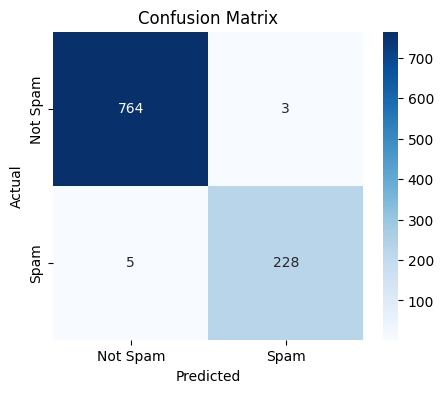

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Example: Test the model with one spam and one ham email

def predict_email(text):
    # Preprocess
    cleaned = preprocess_text(text)
    # Vectorize
    vec = vectorizer.transform([cleaned])
    # Predict
    pred = svm.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

# Test emails
test_spam = "Congratulations! You have won a $1000 Walmart gift card. Click here to claim your prize now."
test_ham = "Hi John, can we reschedule our meeting to next week? Let me know your availability."

print("Spam test prediction:", predict_email(test_spam))
print("Ham test prediction:", predict_email(test_ham))


Spam test prediction: Spam
Ham test prediction: Ham


In [32]:
import nltk
nltk.download('punkt')
print(nltk.word_tokenize("This is an example."))

['This', 'is', 'an', 'example', '.']


[nltk_data] Downloading package punkt to /home/abdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
import spacy


In [2]:

spacy.cli.download('en_core_web_sm')
nlp= spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import spacy
spacy.cli.download("en_core_web_sm")  # Download the model if not present
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is an example.")
print([token.text for token in doc])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
['This', 'is', 'an', 'example', '.']
